### Project on Machine learning on Flight price

In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
#Load the libraries that are required for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [3]:
#Load the data in to the local machine
df=pd.read_csv("/content/gdrive/MyDrive/trainable_complete2.xls")
df.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6


In [4]:
df.tail()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours
330933,9338,09:50,23:50,Spicejet,PE,Port Blair,30,Mumbai,1,840,6,9,Morning_flight,15
330934,9338,09:50,08:20,Spicejet,PE,Port Blair,30,Mumbai,1,1350,6,9,Morning_flight,15
330935,11092,09:50,09:05,Spicejet,PE,Port Blair,30,Bengaluru,1,1395,6,9,Morning_flight,15
330936,5588,09:50,12:05,Spicejet,PE,Port Blair,30,Chennai,0,135,6,9,Morning_flight,15
330937,5313,11:55,14:20,Vistara,PE,Port Blair,30,Kolkata,0,145,6,11,Afternoon_flight,17


### Let's do some EDA

In [5]:
class DataFrame_Info():
    def __init__(self):
        print("Attribute information")
    
    def Attribute_information(self,df):
        """
        This method give us the basic information of all the attributes like count of attributes,number of rows & columns,numerical attributes and categorical attributes and so on
        """
        
        data_info=pd.DataFrame(columns=['No of observation',
                                       'No of variables',
                                       'No of Numerical variables',
                                       'No of Factor variables',
                                       'No of Categorival variables',
                                       'No of Logical variables',
                                       'No of Date Variables',
                                       'No of zero variance variables'])
        
        data_info.loc[0,'No of observation']=df.shape[0]

        data_info.loc[0,'No of variables']=df.shape[1]
        
        data_info.loc[0,'No of Numerical variables']=df._get_numeric_data().shape[1]
        
        data_info.loc[0,'No of Factor variables']=df.select_dtypes(include='category').shape[1]
        
        data_info.loc[0,'No of Categorival variables']=df.select_dtypes(include='object').shape[1]
        
        data_info.loc[0,'No of Logical variables']=df.select_dtypes(include='bool').shape[1]
        
        data_info.loc[0,'No of Date Variables']=df.select_dtypes(include='datetime64').shape[1]
        
        data_info.loc[0,'No of zero variance variables']=df.loc[:,df.apply(pd.Series.nunique)==1].shape[1]
        
        data_info=data_info.transpose()
        
        data_info.columns=['value']
        
        
        
        return data_info
    
    def __get_missing_values(self,data):
        
        """
        It is a private method ,so it cannot accesed by object outsid ethe class.This function will give us a basic information like count of missing values
        """
        
        #Getting sum of missing values for each feature
        missing_values=data.isnull().sum()
        #Feature missing values are ssorted from few to many
        missing_values.sort_values(ascending=False,inplace=True)
        #get the missing values
        return missing_values
    
    def Agg_Tabulation(self,data):
        """
        This method is a extension of additional inforamtion like about the data like Entrophy value,missing value percentage and some observations
        """
        
        print('='*100)
        print('Aggrgation of Table')
        
        table=pd.DataFrame(data.dtypes,columns=['dtypes'])
        table1=pd.DataFrame(data.columns,columns=['Names'])
        table=table.reset_index()
        table=table.rename(columns={'index':'Name'})
        table['No of missing']=data.isnull().sum().values
        table['No of unique']=data.nunique().values
        table['Percent of missing']=((data.isnull().sum().values)/(data.shape[0]))*100
        table['First Observation']=data.loc[0].values
        table['Second observation']=data.loc[1].values
        table['Third Observation']=data.loc[2].values
        
    
        return table
        
        
        print('*'*100)
        print('Interquartile Range')
    def _iqr(self,x):
        """
        It is a private method return you a interquartile range
        """
            
        return x.quantile(q=0.75)-x.quantile(q=0.25)
        
    def __outlier_count(self,x):
        """
        It is a private method which return you a outliers present in a interquartile range
        """
        upper_out=x.quantile(q=0.75)+1.5 * self._iqr(x)
        lower_out=x.quantile(q=0.25)-1.5 * self._iqr(x)
            
        return len(x[x > upper_out])+len(x[x < lower_out])
    def num_count_summary(self,df):
        """
        This method which returns you basci information about Numerica variable like Positive values,Negitive Vlues,Unique Count,Zero count positive and negitive,infiniyt-count and count of outliers
        """
            
        df_num=df._get_numeric_data()
        data_info_num=pd.DataFrame()
        i=0
        for c in df_num.columns:
            data_info_num.loc[c,'Negitive values']=df_num[df_num[c] < 0].shape[0]
            data_info_num.loc[c,'Positive values']=df_num[df_num[c] > 0].shape[0]
            data_info_num.loc[c,'Zero values']=df_num[df_num[c]== 0].shape[0]
            data_info_num.loc[c,'Unique_count']=len(df_num[c].unique())
            data_info_num.loc[c,'Negitive_infinity_count']=df_num[df_num[c]== -np.inf].shape[0]
            data_info_num.loc[c,'Positive_infinity_count']=df_num[df_num[c]== np.inf].shape[0]
            data_info_num.loc[c,'Percentage of miisning values']=df_num[df_num[c].isnull()].shape[0]/df_num.shape[0]
            data_info_num.loc[c,'Count of outliers']=self.__outlier_count(df_num[c])
            i= i+1
        return data_info_num
    def statstical_summary(self,df):
        """
        This method which return you a various percentile of the data including count and mean
        """
        df_num=df._get_numeric_data()
        data_stat_num=pd.DataFrame()
            
        try:
            data_stat_num=pd.concat([df_num.describe().transpose(),
                                        pd.DataFrame(df_num.quantile(q=0.1)),
                                        pd.DataFrame(df_num.quantile(q=0.90)),
                                        pd.DataFrame(df_num.quantile(q=0.95))],axis=1)
            data_stat_num.columns=['count','mean','std','min','25%','50%','75%','max','10%','90%','95%']
        except:
            pass
        return data_stat_num

In [6]:
#Intialize the dataframe object
dataframe=DataFrame_Info()

Attribute information


In [7]:
dataframe.Agg_Tabulation(df)

Aggrgation of Table


,Name,dtypes,No of missing,No of unique,Percent of missing,First Observation,Second observation,Third Observation
0,Price,int64,0,16283,0.0,3112,3113,3113
1,departure_time,object,0,248,0.0,14:30,16:55,16:45
2,arrival_time,object,0,256,0.0,20:20,21:10,21:05
3,Airline,object,0,44,0.0,AirAsia,Go Air,Go Air
4,Cabin,object,0,3,0.0,E,E,E
5,Dept_city,object,0,30,0.0,New Delhi,New Delhi,New Delhi
6,Dept_date,int64,0,31,0.0,1,1,1
7,arrival_city,object,0,30,0.0,Mumbai,Mumbai,Mumbai
8,stops,int64,0,7,0.0,1,1,1
9,duration,int64,0,288,0.0,350,255,260


In [8]:
dataframe.Attribute_information(df)

,value
No of observation,330938
No of variables,14
No of Numerical variables,7
No of Factor variables,0
No of Categorival variables,7
No of Logical variables,0
No of Date Variables,0
No of zero variance variables,0


In [9]:
dataframe.num_count_summary(df)

,Negitive values,Positive values,Zero values,Unique_count,Negitive_infinity_count,Positive_infinity_count,Percentage of miisning values,Count of outliers
Price,0.0,330938.0,0.0,16283.0,0.0,0.0,0.0,58747.0
Dept_date,0.0,330938.0,0.0,31.0,0.0,0.0,0.0,0.0
stops,0.0,293024.0,37914.0,7.0,0.0,0.0,0.0,3477.0
duration,0.0,330539.0,399.0,288.0,0.0,0.0,0.0,0.0
weekday,0.0,269738.0,61200.0,7.0,0.0,0.0,0.0,0.0
dept_hours,0.0,330490.0,448.0,24.0,0.0,0.0,0.0,0.0
optimal_hours,0.0,317151.0,13787.0,24.0,0.0,0.0,0.0,0.0


In [10]:
dataframe.statstical_summary(df)

,count,mean,std,min,25%,50%,75%,max,10%,90%,95%
Price,330938.0,14074.894817,15968.136248,1579.0,5450.0,7559.0,11742.0,115432.0,4152.0,41350.0,53706.0
Dept_date,330938.0,16.713064,8.166245,1.0,10.0,17.0,24.0,31.0,6.0,28.0,30.0
stops,330938.0,1.278974,0.802891,0.0,1.0,1.0,2.0,6.0,0.0,2.0,3.0
duration,330938.0,590.186636,364.512309,0.0,325.0,515.0,845.0,1435.0,130.0,1165.0,1290.0
weekday,330938.0,2.902087,2.088561,0.0,1.0,3.0,5.0,6.0,0.0,6.0,6.0
dept_hours,330938.0,12.602539,4.848977,0.0,9.0,12.0,16.0,23.0,7.0,20.0,21.0
optimal_hours,330938.0,12.568575,6.882780,0.0,7.0,13.0,18.0,23.0,2.0,21.0,22.0


In [11]:
#load the categorical data in to the "cat_data" and get the patters inside of the categorical data
cat_data=df.select_dtypes(include="object")
cat_data.head()

,departure_time,arrival_time,Airline,Cabin,Dept_city,arrival_city,Dept_flights_time
0,14:30,20:20,AirAsia,E,New Delhi,Mumbai,Afternoon_flight
1,16:55,21:10,Go Air,E,New Delhi,Mumbai,Evening_flight
2,16:45,21:05,Go Air,E,New Delhi,Mumbai,Evening_flight
3,07:55,13:00,Go Air,E,New Delhi,Mumbai,Morning_flight
4,09:00,14:20,Go Air,E,New Delhi,Mumbai,Morning_flight


In [15]:
#Check the values in each variables inside of the categorical data
def value_cat(var,cat_data):
  print("*"*15+var+"*"*15)
  print(cat_data[var].value_counts())

In [13]:
for _ in cat_data.columns:
  value_cat(_,cat_data)

***************departure_time***************
08:55    5024
09:40    4759
12:10    4709
15:25    4590
21:10    4347
         ... 
22:40      11
01:00       6
00:05       4
01:50       3
02:25       3
Name: departure_time, Length: 248, dtype: int64
***************arrival_time***************
18:10    6386
22:20    6284
08:25    5399
09:05    4896
08:55    4230
         ... 
02:45       3
05:15       3
01:55       2
02:10       2
03:30       1
Name: arrival_time, Length: 256, dtype: int64
***************Airline***************
Air India              111908
IndiGo                  88266
Spicejet                26657
Go Air                  25835
Vistara                 14426
AirAsia                 13729
IndiGo, Air India        5024
Air India, IndiGo        4861
IndiGo, Go Air           4513
Vistara, Air India       3771
Spicejet, IndiGo         3672
Go Air, IndiGo           3557
IndiGo, Spicejet         3188
IndiGo, AirAsia          2728
AirAsia, IndiGo          2261
Air India, Go Air     

In [16]:
columns_to_do_plot=cat_data[['Airline', 'Cabin', 'Dept_city', 'departure_time', 'arrival_time','arrival_city','Dept_flights_time']]

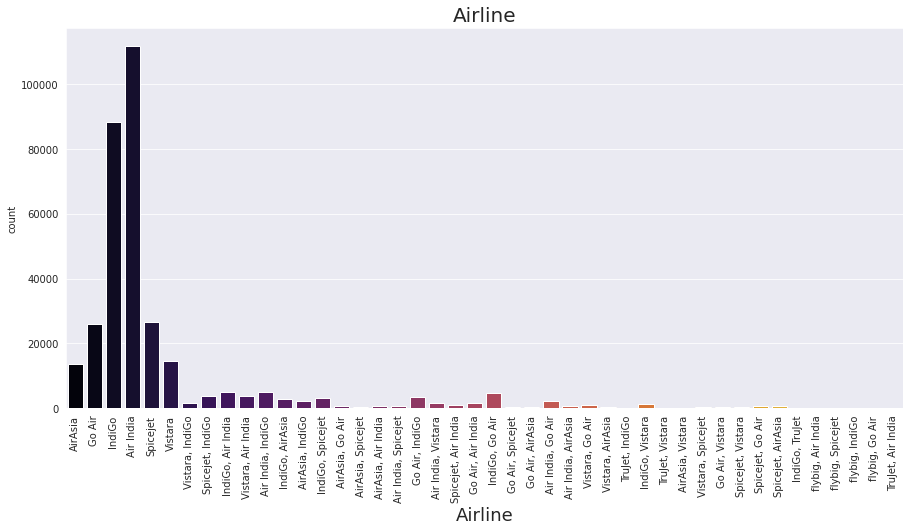

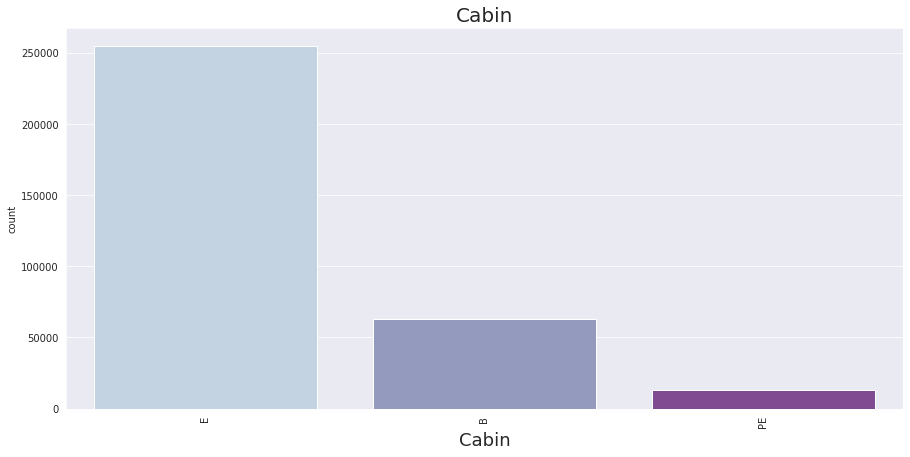

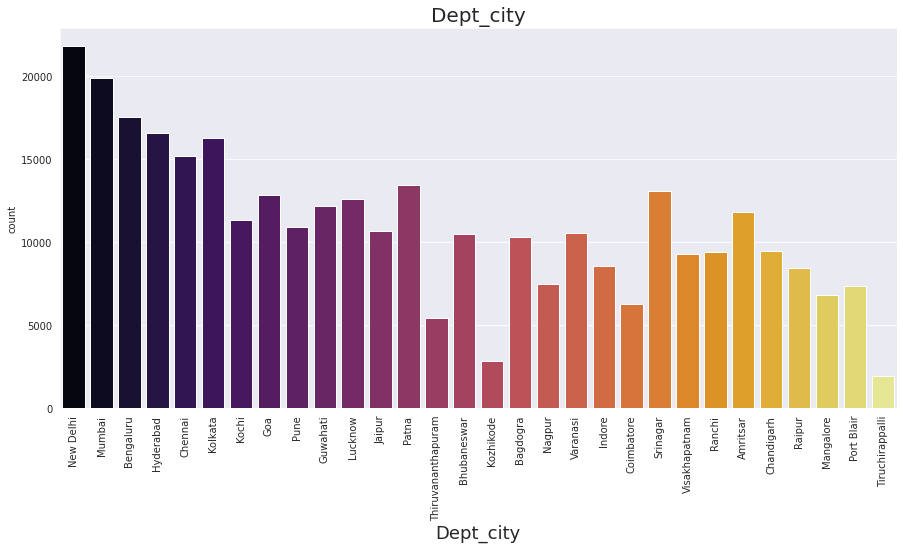

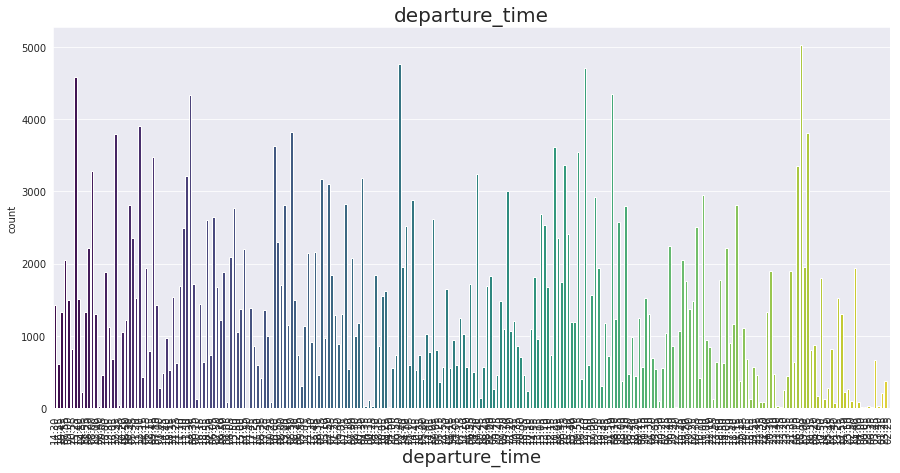

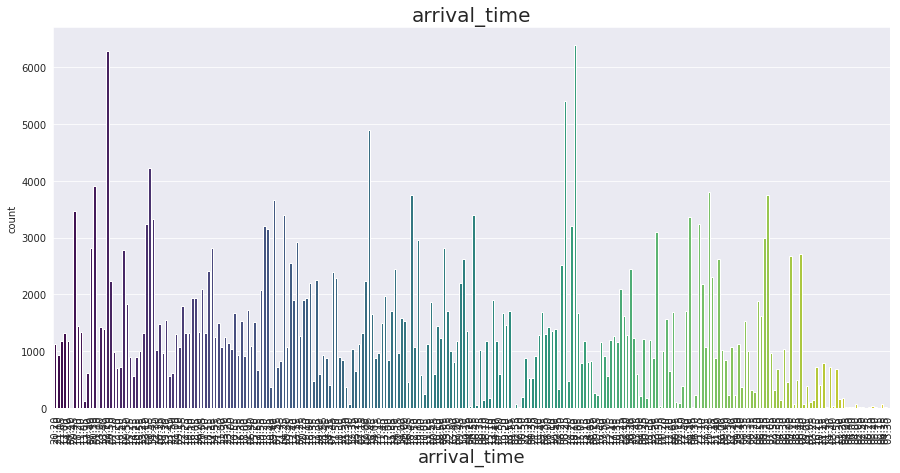

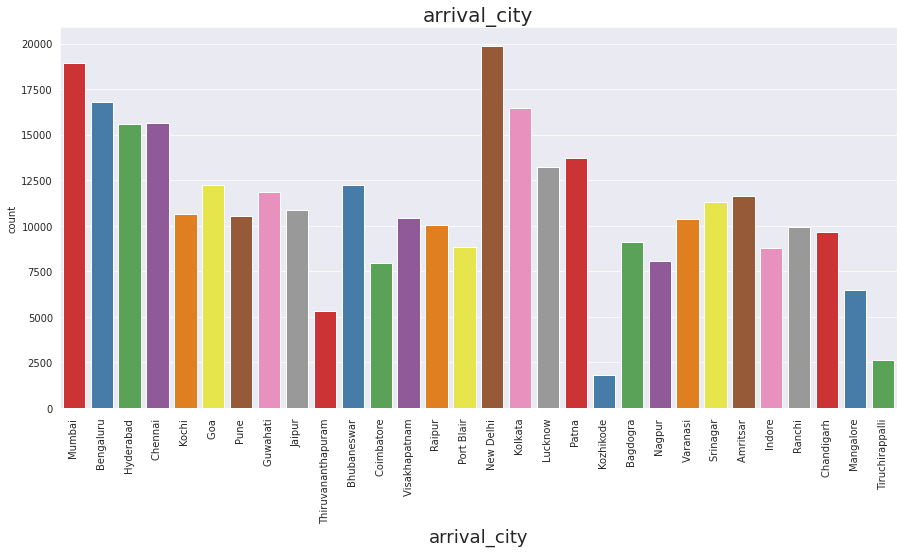

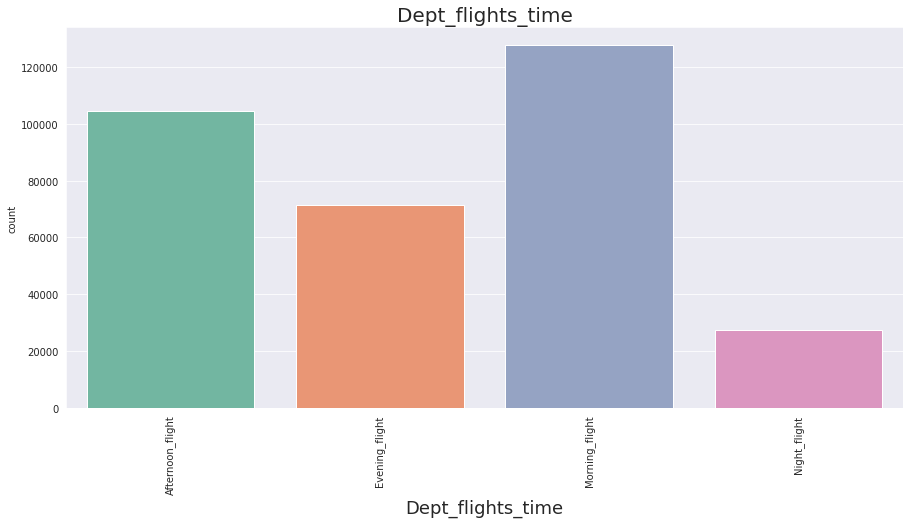

In [17]:
#Visualize the categories with the help of bar plot
import random
for i in columns_to_do_plot.columns:
  for j in random.choices(['summer','viridis','Set1','Set2','Set3','BuPu','inferno']):
    plt.figure(figsize=(15,7))
    sns.set_style('darkgrid')
    g=sns.countplot(x=i,data=cat_data,palette=j)
    g.set_xlabel(i,fontsize=18)
    g.set_xticklabels(g.get_xticklabels(),rotation=90)
    g.set_title(i,fontsize=20)
    plt.show()

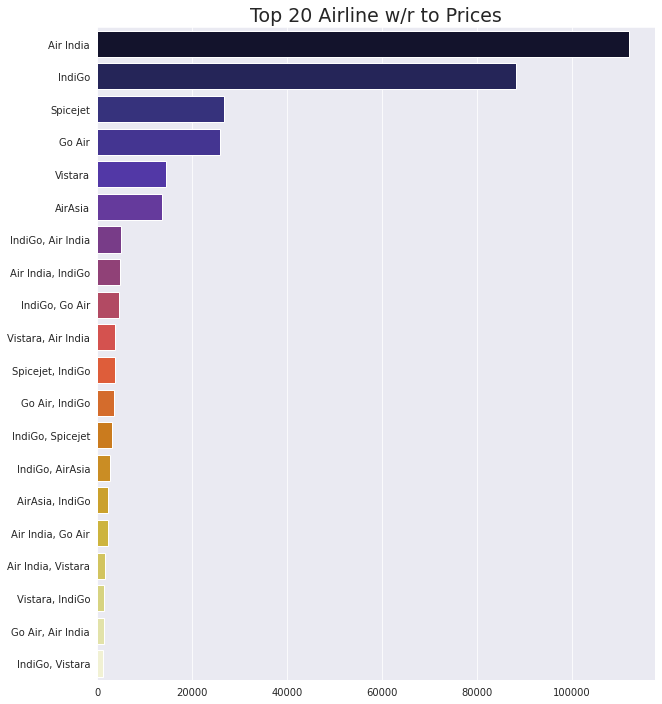

In [18]:
#Compare the each category in categorical column with the "Price columns" 
#Get the top 10 flights to compare with the Price column
top_20=df["Airline"].value_counts()[:20]
plt.figure(figsize=(10,12))
gv=sns.barplot(y=top_20.index,x=top_20.values,data=df,palette="CMRmap")
plt.title("Top 20 Airline w/r to Prices",fontsize=19)
plt.show()

The Flight price of the indigo airline is very high as compared to the other airline

In [19]:
def compare_with_tar(var,columns_to_do_plot,df):
  plt.style.use('fivethirtyeight')
  sns.catplot(x=var,y='Price',data=df,palette="viridis",aspect=2,height=5,kind='box')
  plt.title(var+"vs Price")
  plt.xticks(rotation=90)
  plt.show()

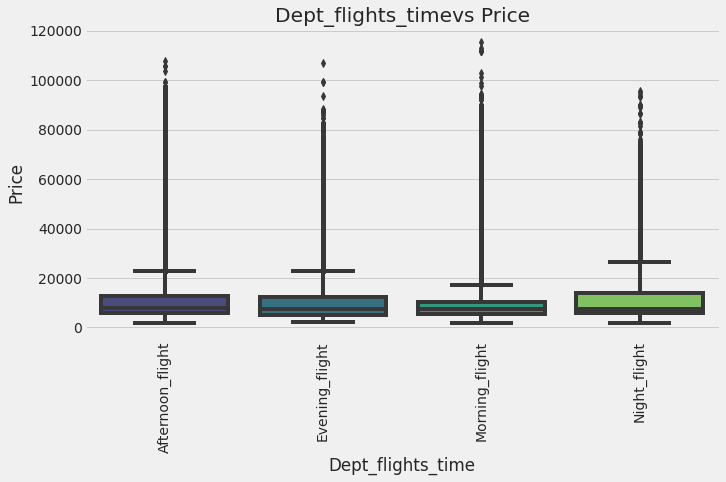

In [23]:
compare_with_tar("Dept_flights_time",columns_to_do_plot,df)

In [21]:
#Check Stops and dept flight time with the price
gv=df.groupby(["stops","Dept_flights_time"])[["Price"]].mean()
print(f"The flight price of the '{gv['Price'].idxmax()[1]}' is comparitvely higher with the No stops of '{gv['Price'].idxmax()[0]}' and the flight price is '{gv['Price'].max()}'",'\n')
print(f"The flight price of the '{gv['Price'].idxmin()[1]}' is comparitvely lower and the No of stops are '{gv['Price'].idxmin()[0]}' and the flight price is '{gv['Price'].min()}'")

The flight price of the 'Afternoon_flight' is comparitvely higher with the No stops of '6' and the flight price is '90117.0' 

The flight price of the 'Night_flight' is comparitvely lower and the No of stops are '0' and the flight price is '6017.958381952548'


As we can see the flight price on the Saturday and sunday is comparitivle higher

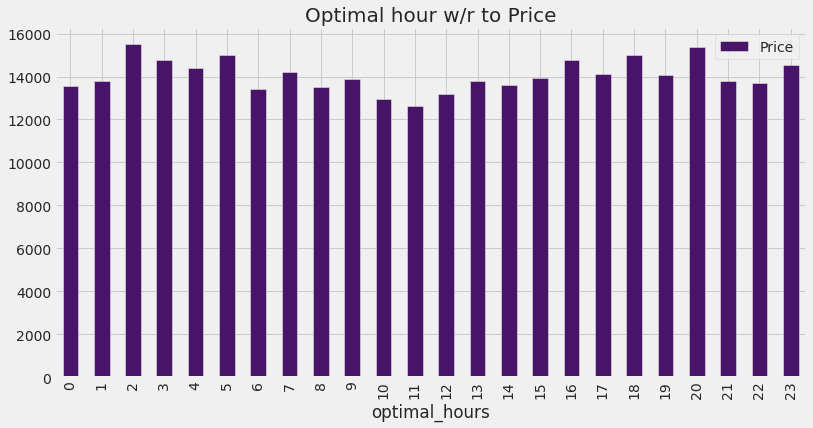

In [26]:
vg=df.groupby("optimal_hours")[["Price"]].mean()
vg.plot.bar(color=sns.color_palette("viridis",18),figsize=(12,6))
plt.title("Optimal hour w/r to Price",fontsize=20)
plt.show()

The Price at Optimal_hr(23) is relatively higher and lower in Optimal_hr (20)

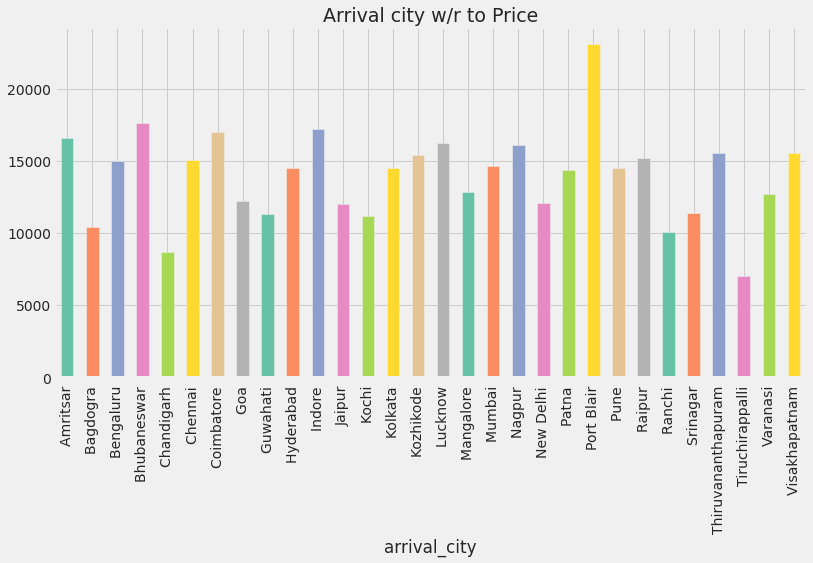

In [27]:
#Get the which arrival city highest and lowest flight price
arr=df.groupby("arrival_city")["Price"].mean()
arr.plot.bar(color=sns.color_palette("Set2",8),figsize=(12,6))
plt.title("Arrival city w/r to Price",fontsize=19)
plt.show()

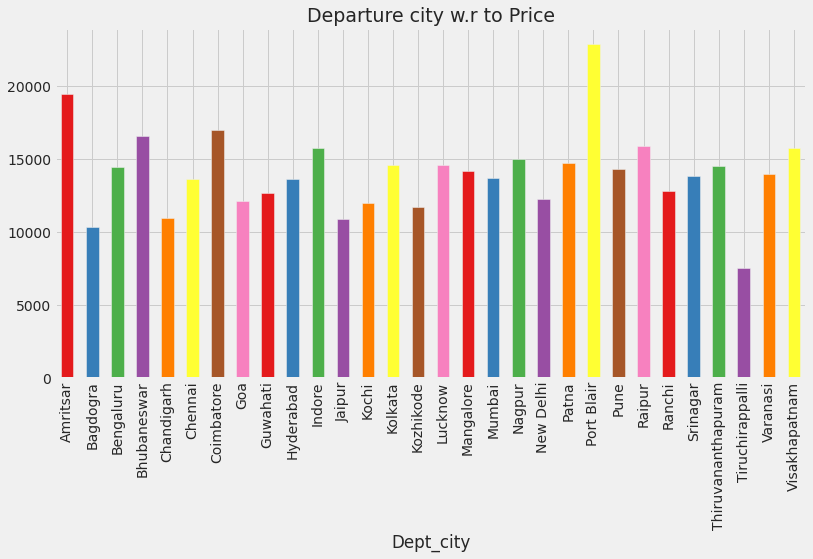

In [28]:
#Get the which dept city has highest flight price
arr1=df.groupby("Dept_city")["Price"].mean()
arr1.plot.bar(color=sns.color_palette("Set1",8),figsize=(12,6))
plt.title("Departure city w.r to Price",fontsize=19)
plt.show()

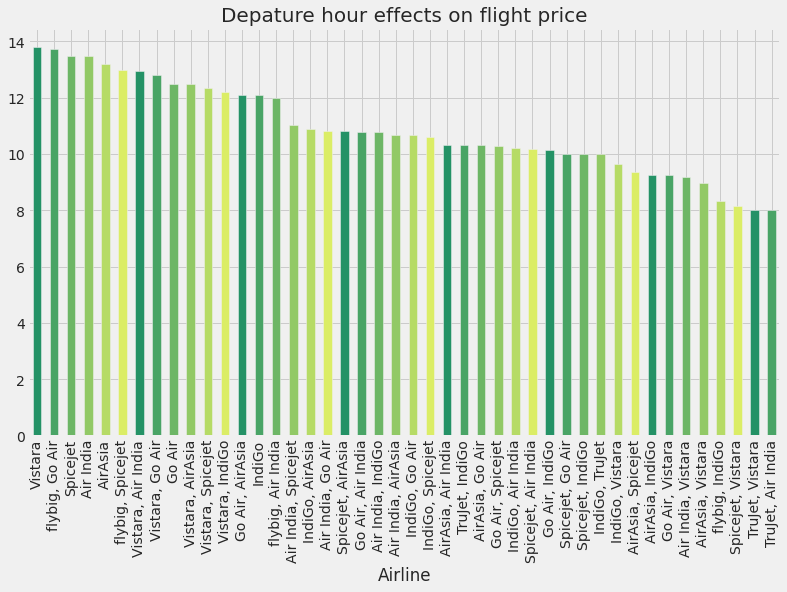

In [29]:
#Check the How many hours if a flight take to departure will affect on a price
debt=df.groupby("Airline")["dept_hours"].mean().sort_values(ascending=False)
debt.plot.bar(color=sns.color_palette("summer"),figsize=(12,7))
plt.title("Depature hour effects on flight price",fontsize=20)
plt.show()

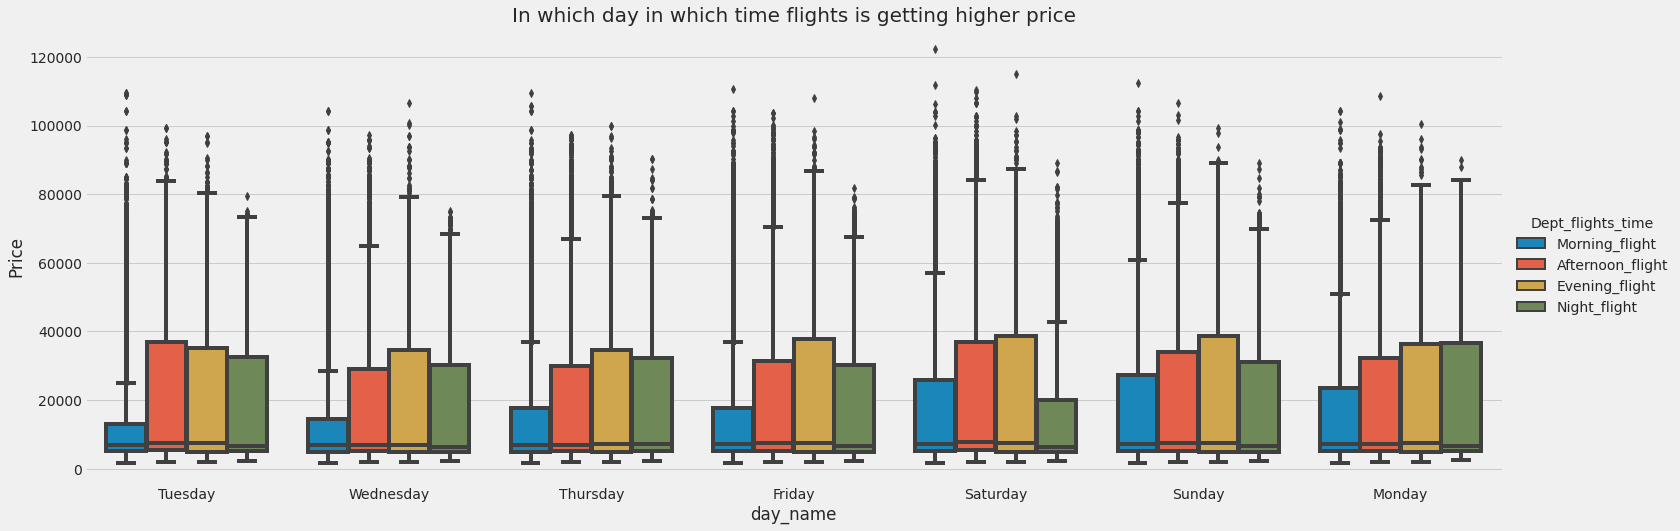

In [ ]:
#Check In which day in which flight is getting higher price
sns.catplot(x='day_name',y='Price',hue='Dept_flights_time',kind='box',data=df,height=7,aspect=3)
plt.title("In which day in which time flights is getting higher price",fontsize=20)
plt.show()

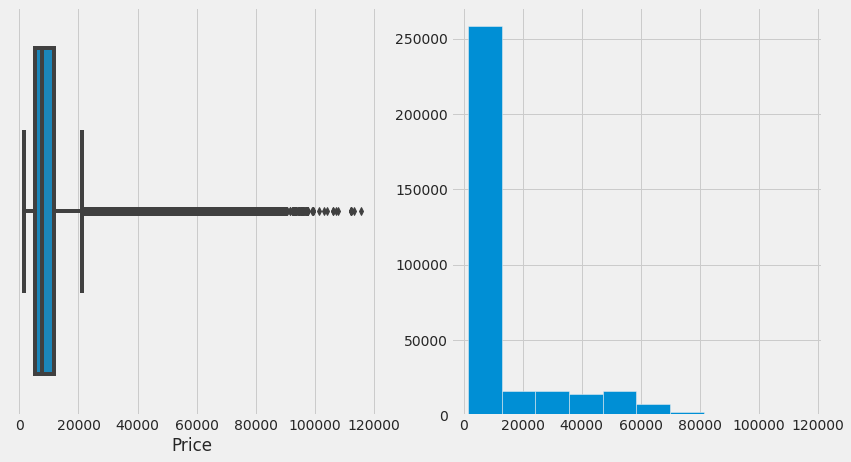

In [30]:
#Check the distribution of the Price column
fig,ax=plt.subplots(1,2,figsize=(13,7))
df["Price"].hist(ax=ax[1])
sns.boxplot(x=df['Price'],ax=ax[0])

We can observe that our price column show's right skewness we need to handle by using feature transformation techniques else it will impact on our model perfromance, most of the Flight price data is falling on Left side show's right skewness. also our price column has so many outliers we need to take care of that by using IQR method.

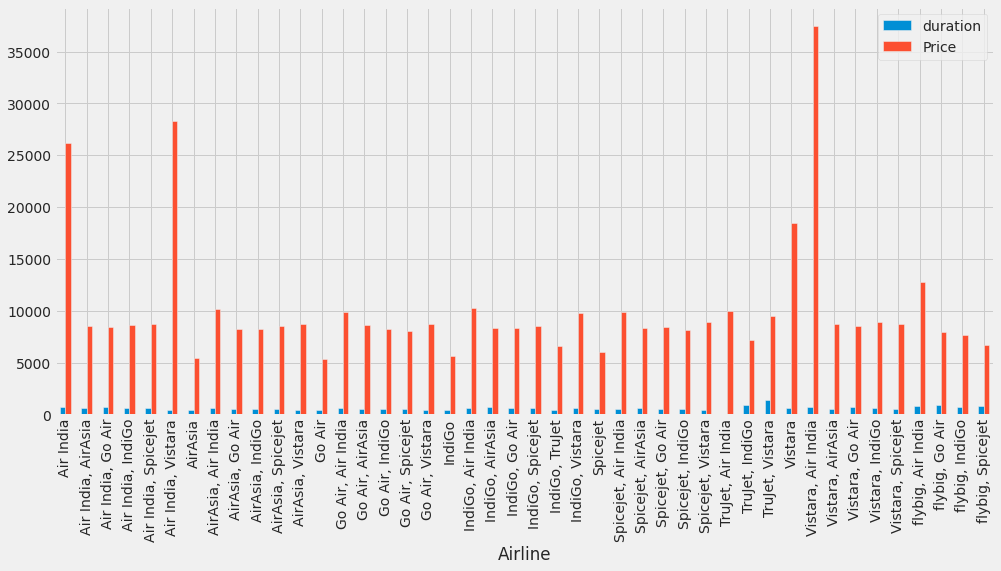

In [31]:
#Whcih airline takes high duration with respect to the price
ddr=df.groupby("Airline")[["duration","Price"]].mean()
ddr.plot.bar(figsize=(15,7))

Text(0.5, 1.0, 'Correlation Matrix')

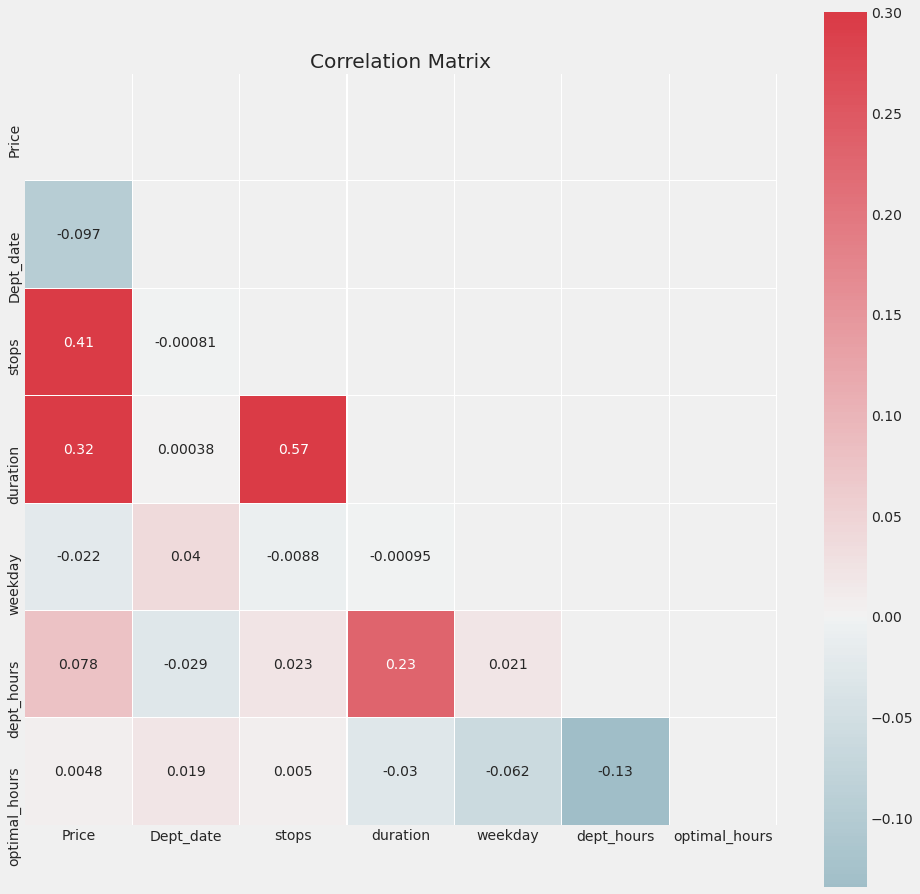

In [32]:
#Finding and plotting the correlation matrix for top20 features

cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(15,15))

corr=df.corr()

#Genrate a mask triangle for a upper traingle
mask=np.triu(np.ones_like(corr,dtype=np.bool))

g=sns.heatmap(corr,annot=True,mask=mask,vmax=0.3,center=0,square=True,cmap=cmap,linewidths=0.05)
plt.title('Correlation Matrix')

As we can see the correlation matrix
1. Stops-Price is moderatly correlated (0.47)
2. Duration-Price is Higly Correlated (0.41)
3. Dept_hrs-Optimal_hr is Strongly correlated (0.85)
4. Stops-Duration is moderatly correlated (0.57)

In [33]:
#Our "Airline" data column has two categories such as departure flight and return flight so we need to take that those as two features instead of one variable
recent=pd.DataFrame(df['Airline'].apply(lambda x: x.split(',')).values.tolist(),columns=['Airline_1','Airline_2'])
recent_1=recent["Airline_1"]
recent_1

0          AirAsia
1           Go Air
2           Go Air
3           Go Air
4           Go Air
            ...   
330933    Spicejet
330934    Spicejet
330935    Spicejet
330936    Spicejet
330937     Vistara
Name: Airline_1, Length: 330938, dtype: object

In [34]:
#Fill the null values with the another column such as "Airline_1"
fill_val=recent["Airline_2"].fillna(recent["Airline_1"])
#After handling null values in the airline column concatinate the airline column with the main dataframe
df_new=pd.concat([df,recent_1,fill_val],axis=1)
df_new.head()

,Price,departure_time,arrival_time,Airline,Cabin,Dept_city,Dept_date,arrival_city,stops,duration,weekday,dept_hours,Dept_flights_time,optimal_hours,Airline_1,Airline_2
0,3112,14:30,20:20,AirAsia,E,New Delhi,1,Mumbai,1,350,5,14,Afternoon_flight,11,AirAsia,AirAsia
1,3113,16:55,21:10,Go Air,E,New Delhi,1,Mumbai,1,255,5,16,Evening_flight,13,Go Air,Go Air
2,3113,16:45,21:05,Go Air,E,New Delhi,1,Mumbai,1,260,5,16,Evening_flight,13,Go Air,Go Air
3,3113,07:55,13:00,Go Air,E,New Delhi,1,Mumbai,1,305,5,7,Morning_flight,4,Go Air,Go Air
4,3113,09:00,14:20,Go Air,E,New Delhi,1,Mumbai,1,320,5,9,Morning_flight,6,Go Air,Go Air


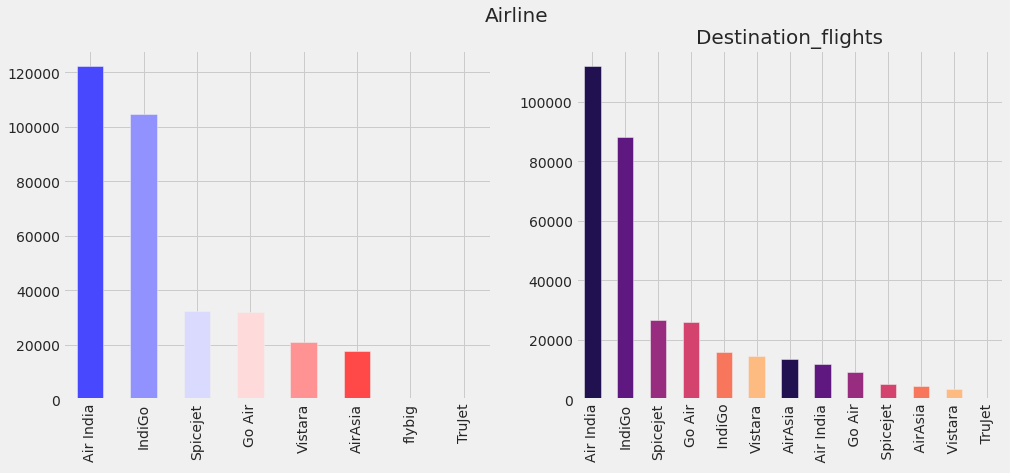

In [35]:
#Our new airline columns data look like
fig,ax=plt.subplots(1,2,figsize=(15,6))
air1=df_new["Airline_1"].value_counts()
air2=df_new["Airline_2"].value_counts()
air1.plot.bar(color=sns.color_palette("bwr"),ax=ax[0],label="Departure Flights")
air2.plot.bar(color=sns.color_palette("magma"),ax=ax[1])
plt.title("Destination_flights",fontsize=20)
plt.suptitle("Airline",fontsize=20)
plt.show()

In [36]:
#Replace the some values in the Airline_1 columns
df_new['Airline_1'].replace("Air India Express","Air India",inplace=True)

In [37]:
df_new["Airline_2"].replace([" Air India Express","Air India Express"," Air India"],"Air India",inplace=True)

In [38]:
df_new["Airline_2"].replace([" AirAsia"," Go Air"," Vistara"," Spicejet"," IndiGo"],["AirAsia","Go Air","Vistara","Spicejet","IndiGo"],inplace=True)

In [42]:
# #Extract the date and month from the date columns
# df_new["Day_of_Dep"]=pd.to_datetime(df_new['Departure_Date']).dt.day
# df_new["Month_of_Dep"]=pd.to_datetime(df_new["Departure_Date"]).dt.month
# df_new["Day_of_Arr"]=pd.to_datetime(df_new["Arrival_Date"]).dt.day
# df_new["month_of_Arr"]=pd.to_datetime(df_new["Arrival_Date"]).dt.month

In [ ]:
#Let's drop the some unwanted columns that doesn't require during model building
# df_1=df_new.copy()
# df_1.drop(labels=["Airline","Dept_date","layover_cities","Departure_Date","Arrival_Date"],axis=1,inplace=True)

### As of Now i converted all categorical values in to the numerical with the help of label encoder based on the model perfromance we can check again and convert in to the different fromat

In [ ]:
#Encode the values in categorical data in to the numerical 
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()
df_1["Dept_city"]=lc.fit_transform(df_1['Dept_city'])
df_1["Dept_month"]=lc.fit_transform(df_1['Dept_month'])
df_1["arrival_city"]=lc.fit_transform(df_1['arrival_city'])
df_1["day_name"]=lc.fit_transform(df_1['day_name'])

In [ ]:
df_1["Dept_flights_time"]=lc.fit_transform(df_1['Dept_flights_time'])
df_1["arrival_flights_time"]=lc.fit_transform(df_1['arrival_flights_time'])
df_1["Airline_1"]=lc.fit_transform(df_1['Airline_1'])
df_1["Airline_2"]=lc.fit_transform(df_1['Airline_2'])

In [ ]:
df_1["Cabin"]=lc.fit_transform(df_1['Cabin'])

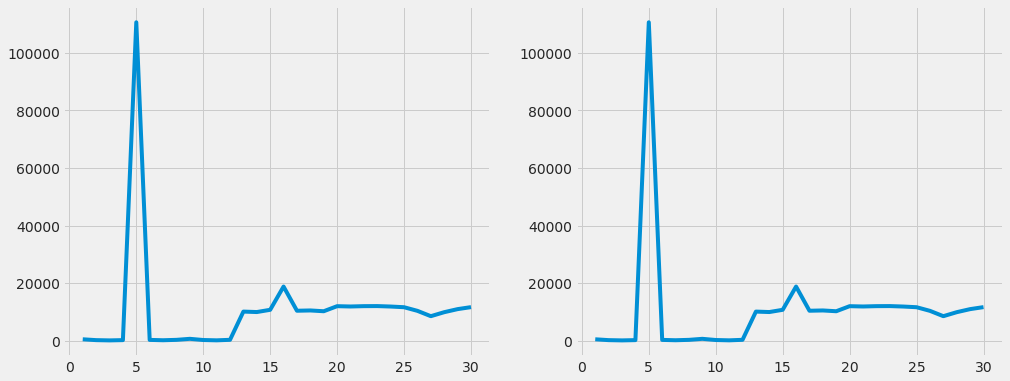

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
_gh=df_1['Day_of_Dep'].value_counts().sort_index(ascending=True)
_gh.plot(kind='line',ax=ax[0])
_gh_1=df_1['Day_of_Arr'].value_counts().sort_index(ascending=True)
_gh_1.plot(kind="line",ax=ax[1])

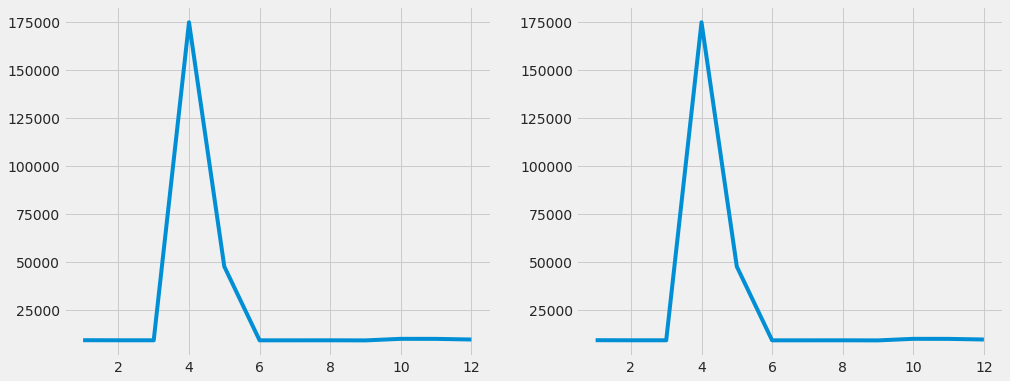

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(15,6))
_lf=df_1['Month_of_Dep'].value_counts().sort_index(ascending=True)
_lf.plot(kind='line',ax=ax[0])
_lf_1=df_1['month_of_Arr'].value_counts().sort_index(ascending=True)
_lf_1.plot(kind="line",ax=ax[1])

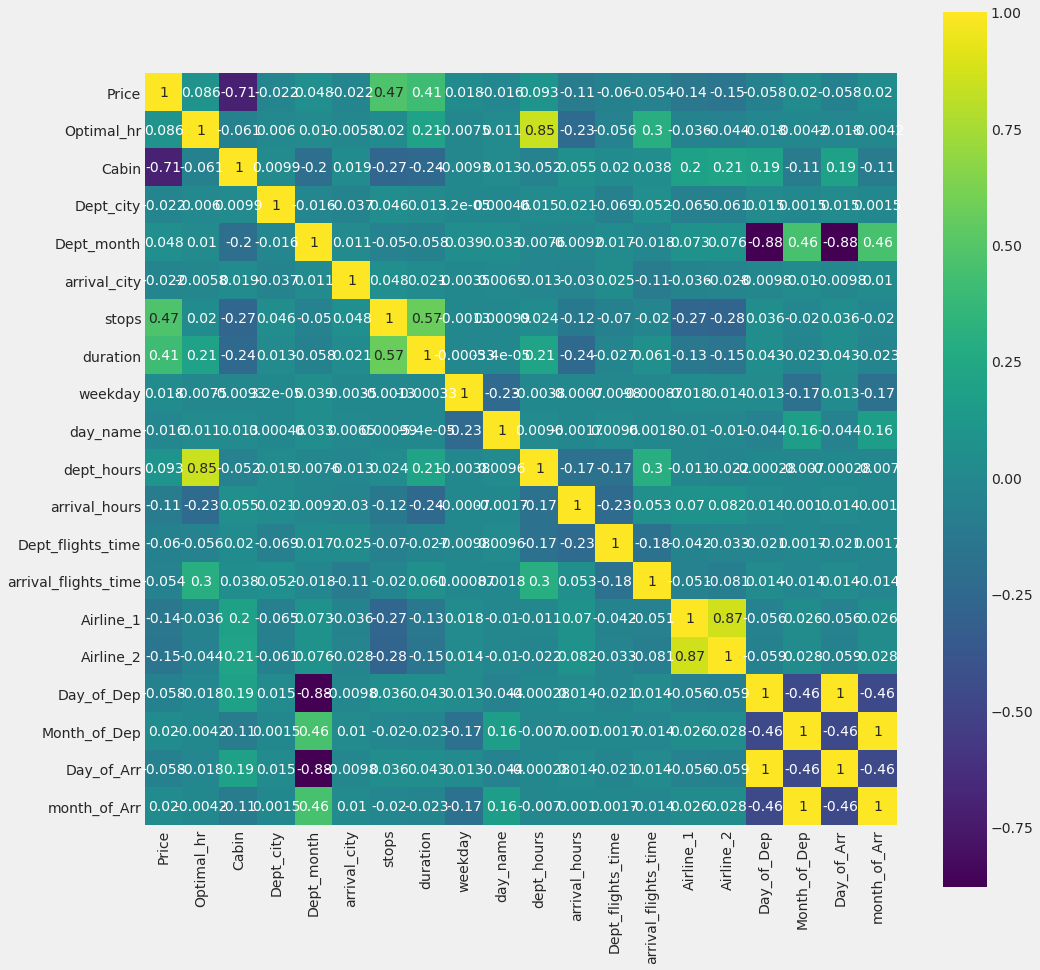

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_1.corr(),annot=True,cmap="viridis",square=True)
plt.show()

Some features in the correlation heatmap are highly correlated let's do some preprocessing

In [ ]:
df_1.head()

,Price,Optimal_hr,Cabin,Dept_city,Dept_month,arrival_city,stops,duration,weekday,day_name,arrival_hours,Dept_flights_time,arrival_flights_time,Airline_1,Airline_2,Day_of_Arr,month_of_Arr
0,6159,5,2,19,0,17,0,130.0,1,5,11,2,0,6,6,20,4
1,6159,11,2,19,0,17,0,130.0,1,5,17,0,1,6,6,20,4
2,6159,12,2,19,0,17,0,130.0,1,5,19,1,1,6,6,20,4
3,6159,8,2,19,0,17,0,135.0,1,5,15,0,0,6,6,20,4
4,6159,13,2,19,0,17,0,140.0,1,5,20,1,1,6,6,20,4


In [ ]:
#Drop those highly correlated features 
df_1.drop(labels=["Day_of_Dep","Month_of_Dep","dept_hours"],axis=1,inplace=True)

In [ ]:
#Split the data in to the x and y
x=df_1.drop("Price",1)
y=df_1['Price']

[01:32:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Optimal_hr ---> 0.001897286
Cabin ---> 0.581278
Dept_city ---> 0.0052673663
Dept_month ---> 0.0033469046
arrival_city ---> 0.004015343
stops ---> 0.17150521
duration ---> 0.043646306
weekday ---> 0.0
day_name ---> 0.0
arrival_hours ---> 0.0049996506
Dept_flights_time ---> 0.0027942215
arrival_flights_time ---> 0.0054429593
Airline_1 ---> 0.061932705
Airline_2 ---> 0.10550052
Day_of_Arr ---> 0.008373464
month_of_Arr ---> 0.0


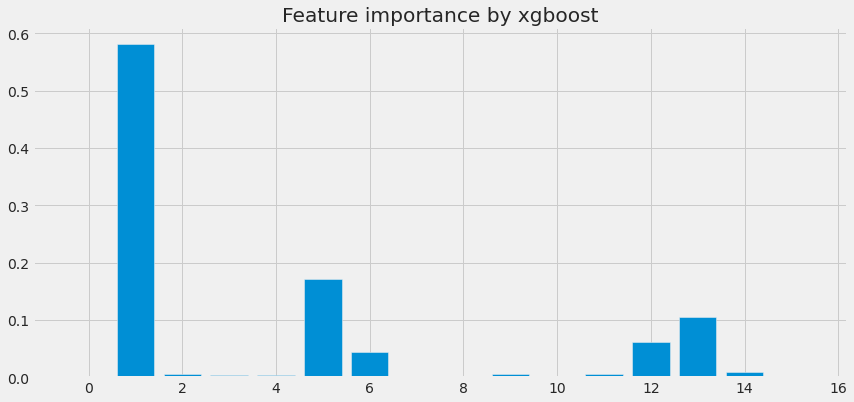

In [ ]:
#Feature selection by xgboost
import xgboost
from xgboost import plot_importance
xgb=xgboost.XGBRegressor()
xgb.fit(x,y)


features=xgb.feature_importances_
columns=x.columns
for i,j in enumerate(features):
    print(columns[i],'--->',j)
    
plt.figure(figsize=(13,6))
plt.title('Feature importance by xgboost')
plt.bar([x for x in range(len(features))],features)
plt.show()

Transformation of Features
Why Transformation of Features Are Required?

Linear Regression---Gradient Descent ----Global Minima Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance Every Point has some vectors and Directiom

Types Of Transformation

Normalization And Standardization
Scaling to Minimum And Maximum values
Scaling To Median And Quantiles
Guassian Transformation Logarithmic Transformation Reciprocal Trnasformation Square Root Transformation Exponential Trnasformation Box Cox Transformation Standardization We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. z=(x-x_mean)/std

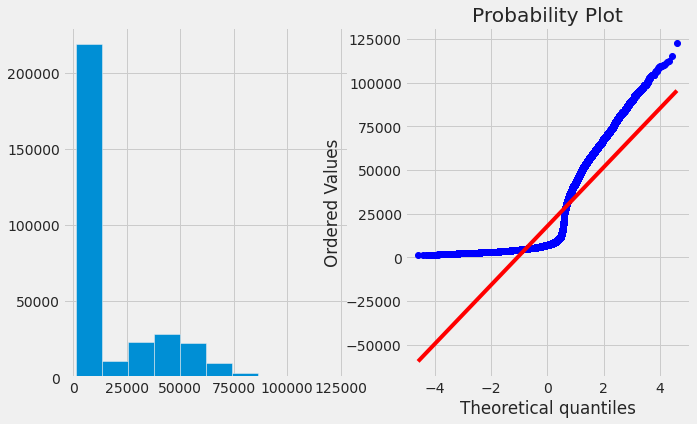

In [ ]:
#Feature transformation on the Price column since it has so many outliers we need to handle that
df_2=df_1.copy()
import scipy.stats as stat
import pylab
def plot_data(data,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()
plot_data(df_2,"Price")

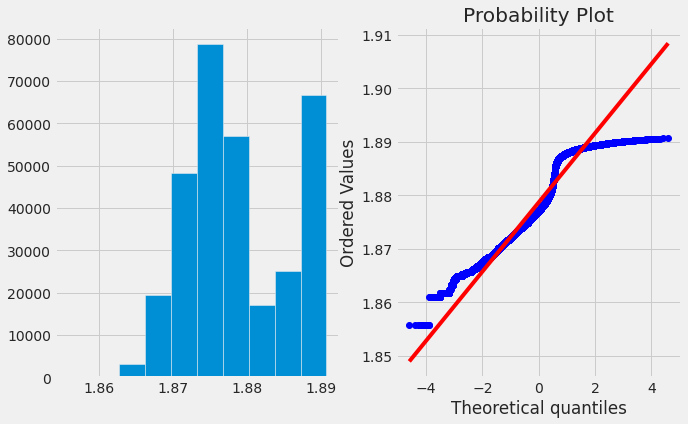

In [ ]:
df_2["Price"],para=stats.boxcox(df_2["Price"])
plot_data(df_2,"Price")

Box plot handles the outliers in the "Price" column effiecently so we can proceed that these transformation